## Importing Libraries

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc

### Loading the dataset using pandas & Giving the column names

In [125]:
#Reading the Data
spam_email_data = pd.read_csv("spambase.data")
#Giving the column names
spam_email_data.columns = ['word_freq_make','word_freq_address','word_freq_all', 'word_freq_3d','word_freq_our','word_freq_over','word_freq_remove', 'word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam_or_not_spam']

# Exploratory Data Analysis

In [126]:
#Reading the first 5 tuples of the dataset
spam_email_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [127]:
#describing the data set
spam_email_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not_spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [128]:
#check number of rows and columns in dataset
spam_email_data.shape

(4600, 58)

### Dropping duplicates if any are present

In [129]:
#checking for duplicates and dropping them
spam_email_data = spam_email_data.drop_duplicates()
display(spam_email_data)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


#### Checking for null values and removing them

In [130]:
#Checking for null values
null_values = spam_email_data.isnull().sum()
null_values

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [131]:
#removing process
spam_email_data.dropna(inplace=True)

### Checking the class distribution and visualization

In [132]:
class_distribution = spam_email_data['spam_or_not_spam'].value_counts()
class_distribution

0    2531
1    1678
Name: spam_or_not_spam, dtype: int64

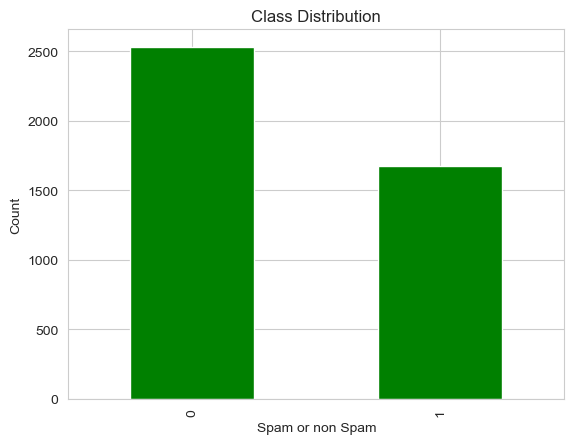

In [133]:
class_distribution.plot(kind='bar',color = 'green')
plt.title('Class Distribution')
plt.xlabel('Spam or non Spam')
plt.ylabel('Count')
plt.show()

#### Correlation Analysis and Visualization

In [134]:
# Check the correlation matrix
correlation_matrix = spam_email_data.corr()
print(correlation_matrix)

                            word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                    1.000000           0.034114       0.063267   
word_freq_address                 0.034114           1.000000       0.027609   
word_freq_all                     0.063267           0.027609       1.000000   
word_freq_3d                      0.005384          -0.008936      -0.019895   
word_freq_our                     0.021740           0.036983       0.065681   
word_freq_over                    0.055040           0.005623       0.066608   
word_freq_remove                  0.011037           0.077468       0.028630   
word_freq_internet               -0.004392           0.013781       0.007263   
word_freq_order                   0.103818           0.053525       0.077618   
word_freq_mail                    0.040799           0.184441       0.025201   
word_freq_receive                 0.063007           0.060819       0.055700   
word_freq_will                    0.0759

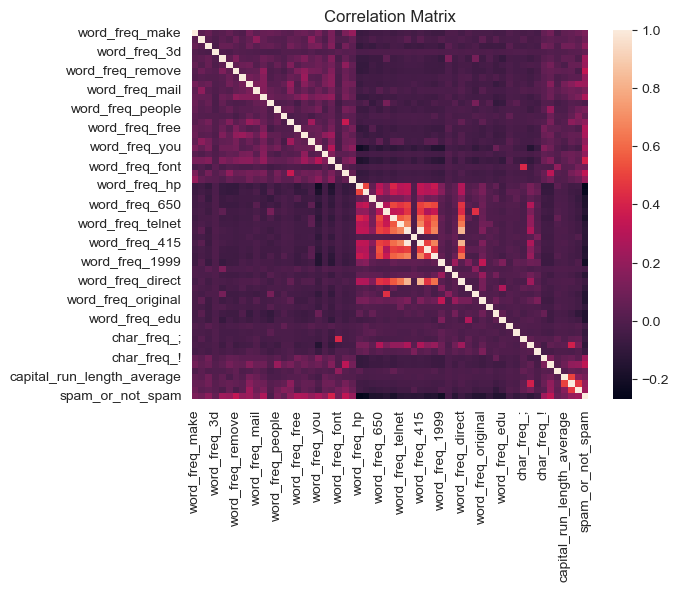

In [135]:
#Visualizing the correlation matrix
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

## Create a dataframe with all training data except the target column

In [136]:
#Dropping the target column
X = spam_email_data.drop(columns=["spam_or_not_spam"])
display(X)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [137]:
#separate target values column
y = spam_email_data['spam_or_not_spam'].values
display(y)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Scaling data

In [138]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.35203068,  0.3687239 ,  0.40452578, ..., -0.00815397,
         0.24482253,  1.19099523],
       [-0.14796835, -0.24776187,  0.81174673, ...,  0.13384834,
         2.16884257,  3.18079631],
       [-0.34796797, -0.24776187, -0.56504793, ..., -0.05572942,
        -0.06081607, -0.16194019],
       ...,
       [ 0.6520301 , -0.24776187,  0.01669629, ..., -0.12007846,
        -0.23117201, -0.27993815],
       [ 2.85202586, -0.24776187, -0.56504793, ..., -0.12783172,
        -0.23618248, -0.34459456],
       [-0.34796797, -0.24776187,  0.69539789, ..., -0.12472438,
        -0.23618248, -0.40601815]])

# Splitting Data

In [139]:
# Splitting the dataset into the Training set and Test set
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

In [140]:
clf = DecisionTreeClassifier(random_state=42)
clf

DecisionTreeClassifier(random_state=42)

In [141]:
clf = clf.fit(X_train_scaled,y_train_scaled)

In [142]:
predTree = clf.predict(X_test_scaled)
predTree

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [143]:
predTree_train = clf.predict(X_train_scaled)
predTree_train

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [144]:
# Making the Confusion Matrix for the testing
cmTree = confusion_matrix(y_test_scaled, predTree)
print(pd.DataFrame(cmTree, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print(classification_report(y_true = y_test_scaled, y_pred = predTree))

          Not-spam  Spam
Not-spam       453    30
Spam            44   315
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       483
           1       0.91      0.88      0.89       359

    accuracy                           0.91       842
   macro avg       0.91      0.91      0.91       842
weighted avg       0.91      0.91      0.91       842



In [145]:
# Making the Confusion Matrix for the training
cmTree_train = confusion_matrix(y_train_scaled, predTree_train)
print(pd.DataFrame(cmTree_train, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print(classification_report(y_true = y_train_scaled, y_pred = predTree_train))

          Not-spam  Spam
Not-spam      2048     0
Spam             2  1317
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2048
           1       1.00      1.00      1.00      1319

    accuracy                           1.00      3367
   macro avg       1.00      1.00      1.00      3367
weighted avg       1.00      1.00      1.00      3367



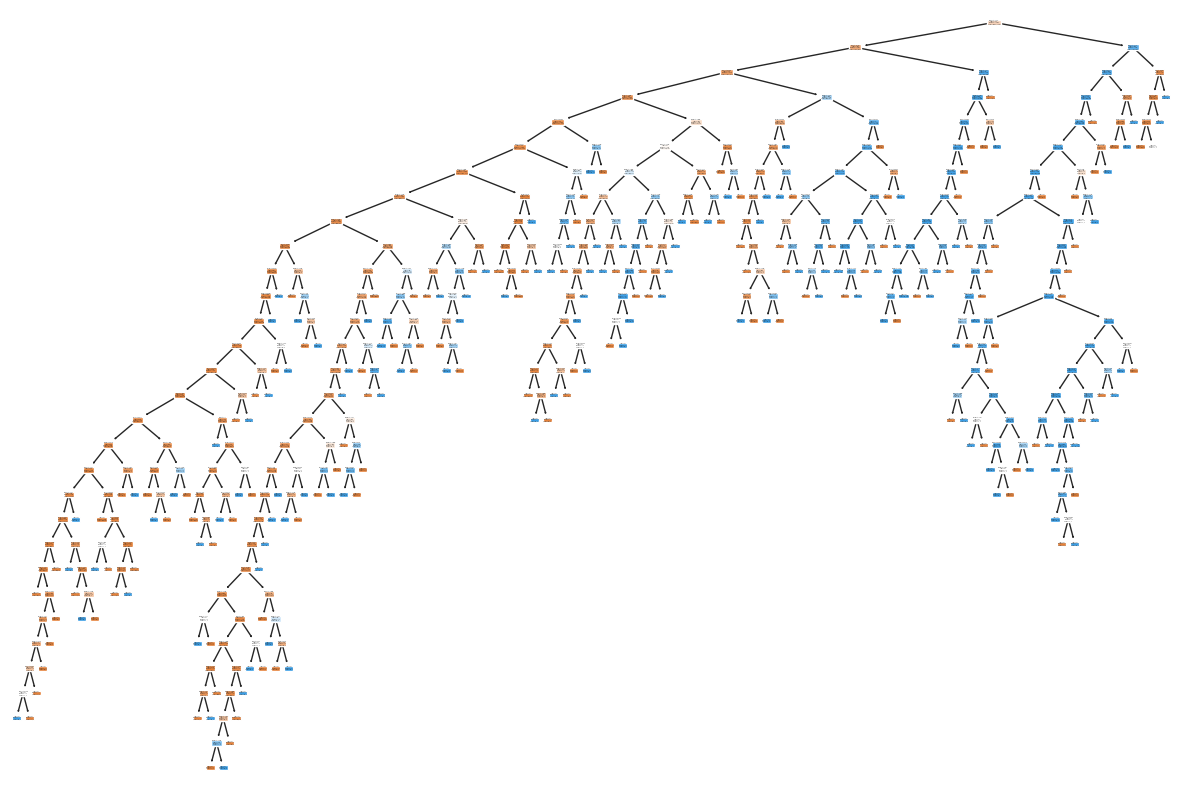

In [146]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

## Applying PCA

In [147]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(4209, 49)

In [148]:
pca.explained_variance_ratio_

array([0.10899513, 0.05583094, 0.0353128 , 0.02858045, 0.0271153 ,
       0.02575975, 0.02483614, 0.02398193, 0.02270325, 0.02183887,
       0.02167963, 0.02015995, 0.02006717, 0.01935537, 0.01924267,
       0.01866808, 0.01848522, 0.01796674, 0.0178274 , 0.01756145,
       0.01717349, 0.01698023, 0.01672036, 0.01657472, 0.01645046,
       0.01610422, 0.01585499, 0.01571016, 0.0153264 , 0.01517569,
       0.01456768, 0.01435856, 0.01421106, 0.01406908, 0.01383434,
       0.01333399, 0.01329598, 0.01301827, 0.01274202, 0.01232527,
       0.01195466, 0.0117737 , 0.01120298, 0.01098196, 0.01036702,
       0.01030622, 0.00936144, 0.00876401, 0.00816524])

In [149]:
pca.explained_variance_ratio_.sum()

0.9566723905184704

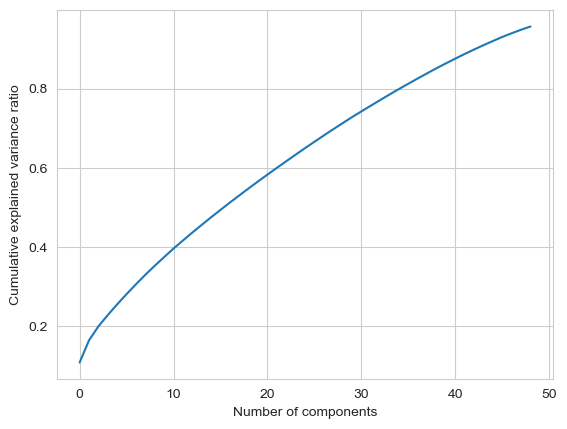

In [150]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

In [151]:
# Splitting the dataset into the Training set and Test set
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.20, random_state=42)

In [152]:
clf = DecisionTreeClassifier(random_state=42)
clf

DecisionTreeClassifier(random_state=42)

In [153]:
clf = clf.fit(X_train_pca,y_train_pca)

In [154]:
predTree_pca_test = clf.predict(X_test_pca)
predTree_pca_test

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,

In [155]:
predTree_pca_train = clf.predict(X_train_pca)
predTree_pca_test

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,

In [156]:
# Making the Confusion Matrix for the testing
cmTree_pca_test = confusion_matrix(y_test_pca, predTree_pca_test)
print(pd.DataFrame(cmTree_pca_test, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print(classification_report(y_true = y_test_pca, y_pred = predTree_pca_test))

          Not-spam  Spam
Not-spam       434    49
Spam            60   299
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       483
           1       0.86      0.83      0.85       359

    accuracy                           0.87       842
   macro avg       0.87      0.87      0.87       842
weighted avg       0.87      0.87      0.87       842



In [157]:
# Making the Confusion Matrix for the training
cmTree_pca_train = confusion_matrix(y_train_pca, predTree_pca_train)
print(pd.DataFrame(cmTree_pca_train, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print(classification_report(y_true = y_train_pca, y_pred = predTree_pca_train))

          Not-spam  Spam
Not-spam      2048     0
Spam             2  1317
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2048
           1       1.00      1.00      1.00      1319

    accuracy                           1.00      3367
   macro avg       1.00      1.00      1.00      3367
weighted avg       1.00      1.00      1.00      3367



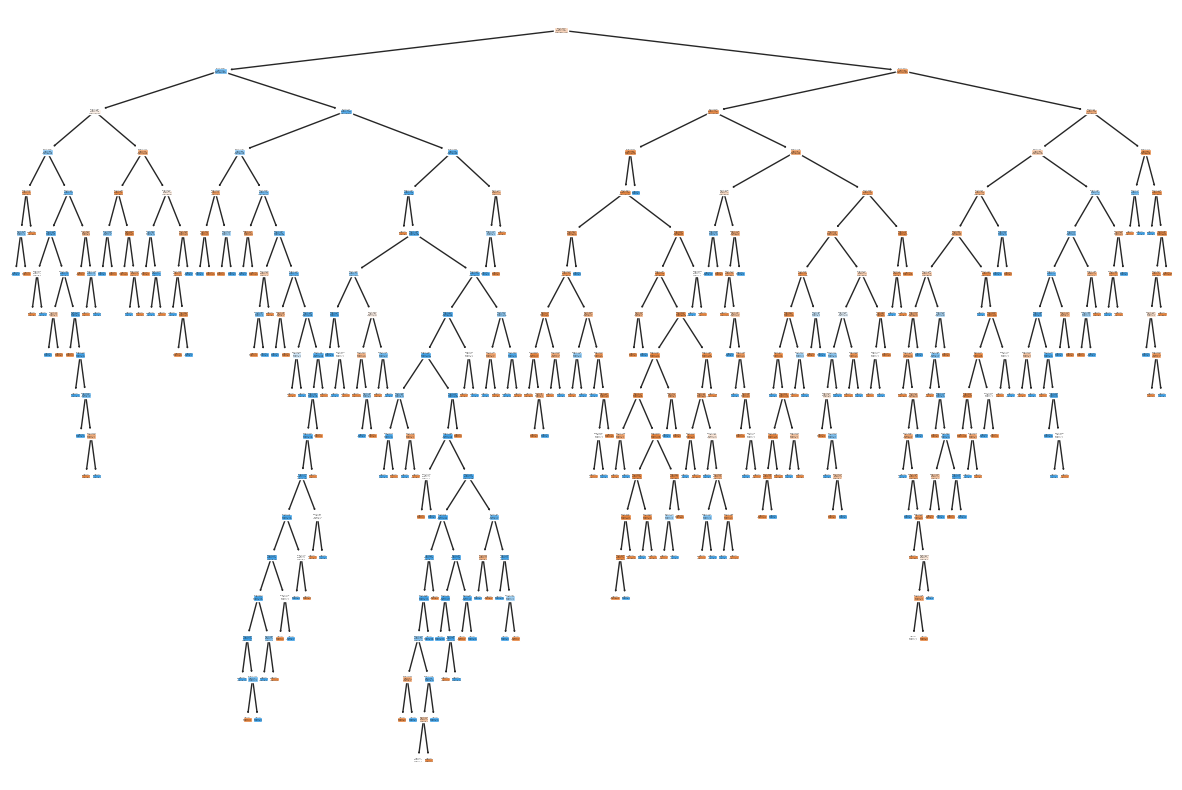

In [158]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

##

In [159]:
dt_probs = clf.predict_proba(X_test_pca)[:,1]

In [160]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_pca,dt_probs)

In [161]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

0.8657099027088127

## Plotting ROC curve

In [162]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

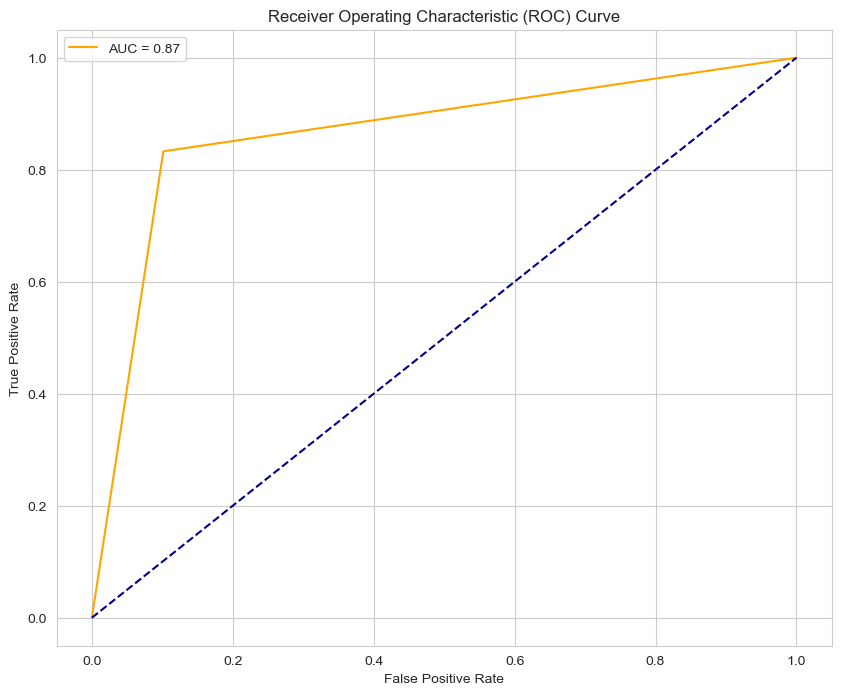

In [163]:
plot_roc_curve(fpr_dt,tpr_dt)

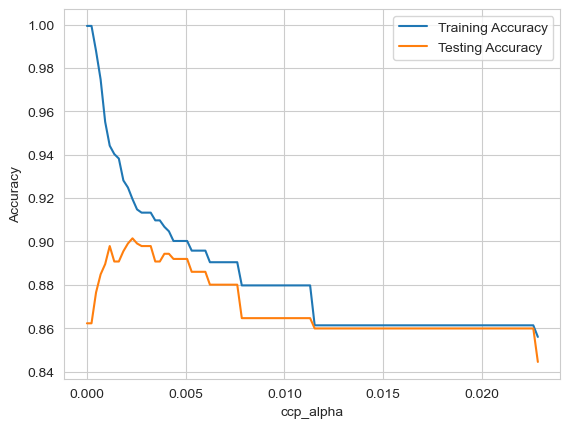

Best ccp_alpha: 0.00029150029150029123


In [164]:
# Calculate the effective alphas using cost complexity pruning
path = clf.cost_complexity_pruning_path(X_train_pca, y_train_pca)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create a list of candidate ccp_alphas to evaluate
ccp_alphas = ccp_alphas[:-1]  # Remove the last alpha, which corresponds to the unpruned tree
candidate_alphas = np.linspace(ccp_alphas[0], ccp_alphas[-1], num=100)

# Train decision trees with increasing ccp_alpha values and evaluate their accuracy
train_accs = []
test_accs = []
for alpha in candidate_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train_pca, y_train_pca)
    train_acc = clf.score(X_train_pca, y_train_pca)
    test_acc = clf.score(X_test_pca, y_test_pca)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

# Plot the training and validation accuracy for each ccp_alpha value
plt.plot(candidate_alphas, train_accs, label="Training Accuracy")
plt.plot(candidate_alphas, test_accs, label="Testing Accuracy")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Find the ccp_alpha value that maximizes the validation accuracy
# best_alpha = candidate_alphas[np.argmax(val_accs)]
# print(f"\nBest ccp_alpha: {best_alpha:.3f}"
# Find the best ccp_alpha value that maximizes the testing accuracy
best_ccp_alpha = ccp_alphas[np.argmax(test_accs)]
print("Best ccp_alpha:", best_ccp_alpha)

In [165]:
path = clf.cost_complexity_pruning_path(X_train_pca, y_train_pca)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

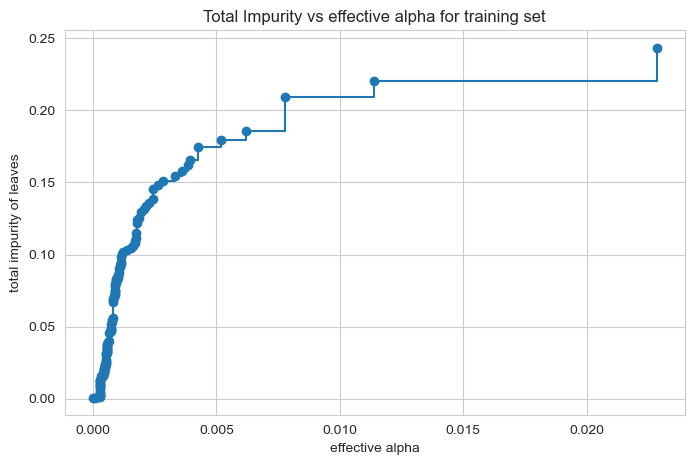

In [166]:
# Visualizing alpha w.r.t impurity of leaves
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [167]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_pca, y_train_pca)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.23319954962731895


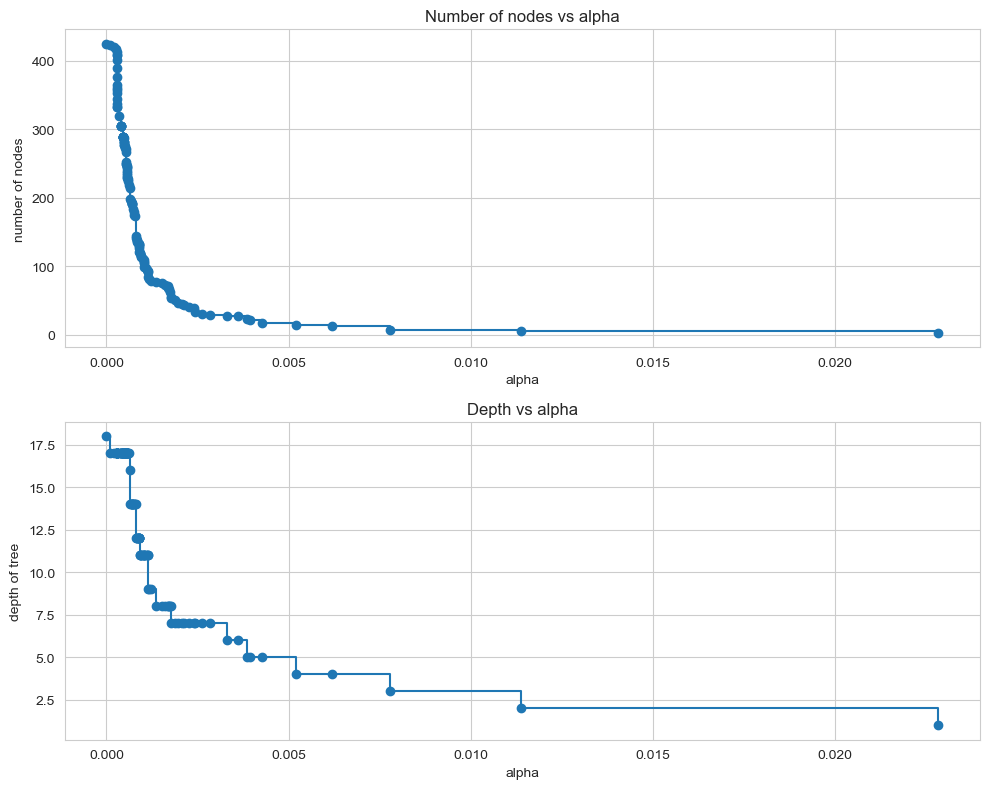

In [168]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

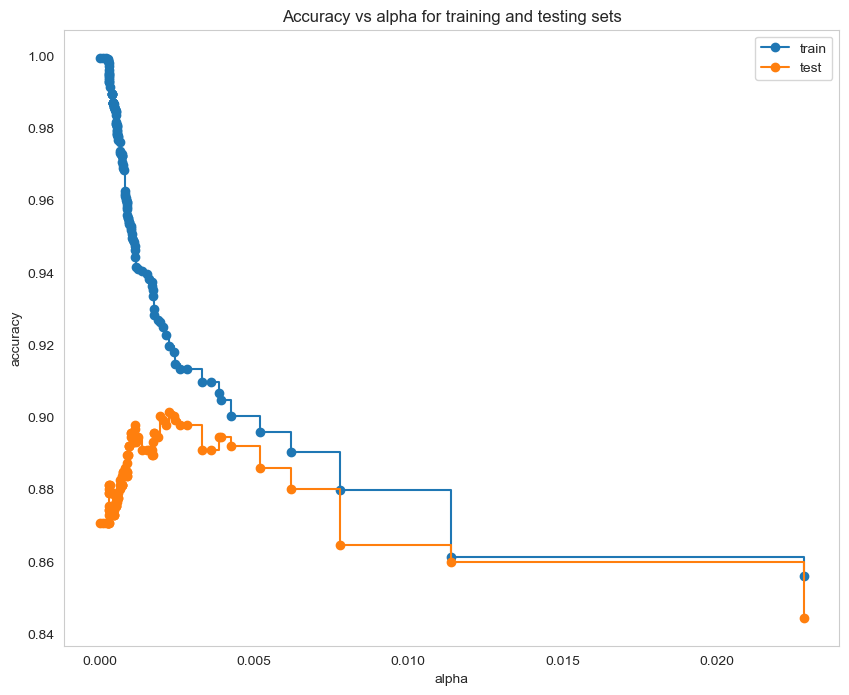

In [169]:
train_scores = [clf.score(X_train_pca, y_train_pca) for clf in clfs]
test_scores = [clf.score(X_test_pca, y_test_pca) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

In [170]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.005)
clf.fit(X_train_pca,y_train_pca)

DecisionTreeClassifier(ccp_alpha=0.005, random_state=42)

In [171]:
pred=clf.predict(X_test_pca)
accuracy_score(y_test_pca, pred)

0.8919239904988123

In [172]:
pred_1 = clf.predict(X_train_pca)
accuracy_score(y_train_pca,pred_1)

0.9002079002079002

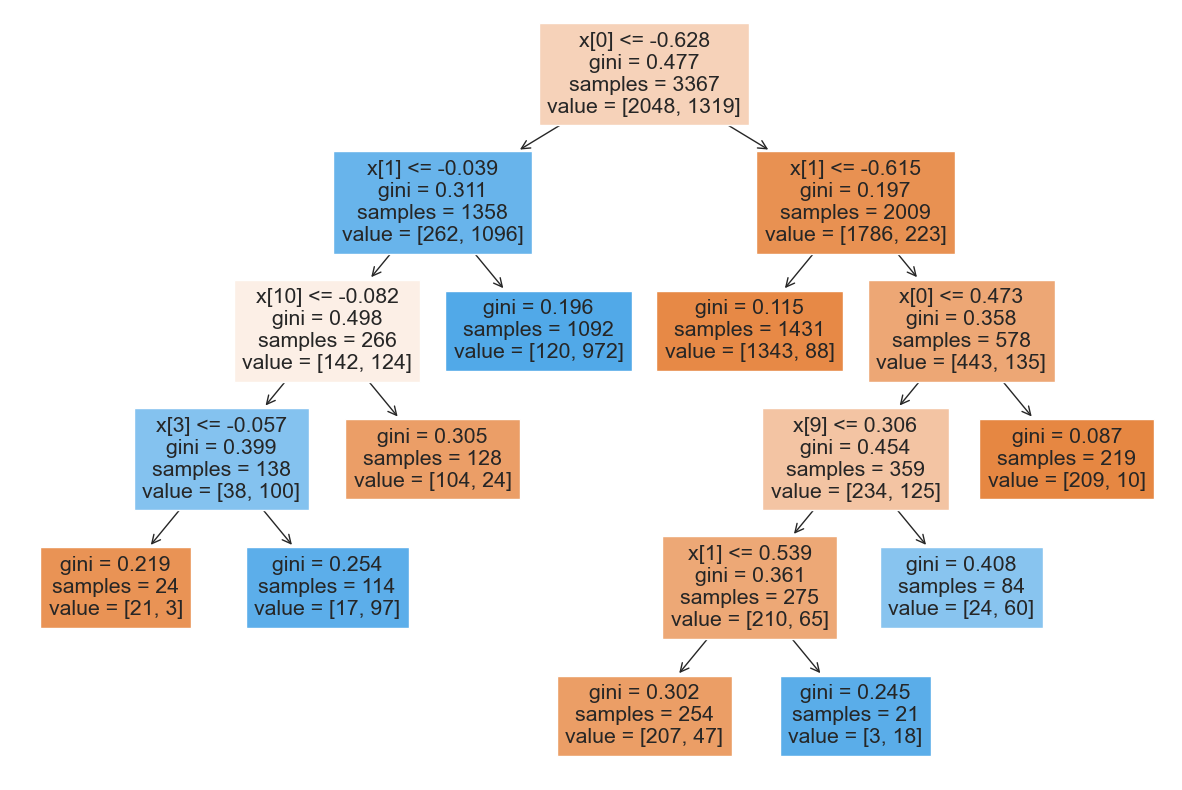

In [173]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()